## Example Class Test on Plant Transcription Factors (from Resit August 2024)

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lucy is interested in the evolution of the ARP family of genes.  These are single copy in most species and encode a protein about 370 aminos acids long.  There's more infomation about them here:

https://www.uniprot.org/uniprotkb/O80931/entry


![alternative text](AS1.png)

NCBI (National Centeral for Biological Infomation) maintains a database of all protein sequences.  BLAST is a program which searches this database looking for matches.  Matches are given a score for the number of matches, mismatches and gaps, the percentage identity to the search protein, and the chances of finding a match as good as this in the database by chance alone (e-value/E()).




Lucy has searched the NCBI database with two different ARP genes to find all the ARP-like proteins.  AS1 is an ARP family gene from Arabidopsis, BARP2 is an ARP family gene from Begonia.  

The blast hits for AS1 are in :
AS1_NCBI.csv

The blast hits for BARP2 are in
BARP2_NCBI.tsv
    
AS1_NCBI.csv is comma delineated.  It does not have a header row, but the columns are:
    
 *Description*,	Infomation about the protein which has matched  
 *Organism*,	Species the match comes from   
 *Common Name*,	common name of the species the match comes from  
 *Score(Bits)*,	Score for the match (higher = better)  
 *Query Cover*,	The percentage of the Query sequence covered by the match  
 *E()*,	The e-value of the match (likelihood of match by chance alone)  
 *Identities(%)*,	The percentage of identical amino acids in the match  
 *Length*,	The length of the matched protein (in amino acids)  
 *Accession*, The unique accession number of the matched protein in the NCBI database  
    
ARP2_NCBI.tsv is tab delineated.  It does have a header row.  

*Hit*	The number of the match in the blast output  
*DB*	Code for the database searched  
*Accession*	The unique accession number of the matched protein in the NCBI database  
*Description*	Infomation about the protein which has matched  
*Organism*	Species the match comes from   
*Length*	The length of the matched protein (in amino acids)  
*Score(Bits)*	Score for the match (higher = better)  
*Identities(%)*	The percentage of identical amino acids in the match  
*Positives(%)*	The percentage of similar amino acids in the match  
*E()* The e-value of the match (likelihood of match by chance alone)  


She needs to combine the results of these searches into a single dataframe listing all the ARP proteins found.  
She needs see how common gene duplication is for this protein.  
She needs to see if there is any evidence that after gene duplication there are changes in the protiens, such as loss/gain of sequence.

#### Checking the searches.  

Read in both files, adding a header row to AS1_NCBI.csv.  Check the head and tail of the dataframes to be sure they've read in correctly

In [2]:
AS1=pd.read_csv('AS1_NCBI.csv', header=None, names=['Description','Organism','Common Name','Score(Bits)','Query Cover','E()','Identities(%)','Length','Accession'])
AS1

,Description,Organism,Common Name,Score(Bits),Query Cover,E(),Identities(%),Length,Accession
0,myb-like HTH transcriptional regulator family ...,Arabidopsis thaliana,thale cress,746,100%,0.000000e+00,100.00,367,NP_181299.1
1,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,736,100%,0.000000e+00,98.64,368,XP_002881522.1
2,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,735,100%,0.000000e+00,98.64,368,XP_002881519.1
3,transcription factor AS1 [Capsella rubella],Capsella rubella,NaN,721,100%,0.000000e+00,96.47,368,XP_006294459.1
4,PREDICTED: transcription factor AS1 [Camelina ...,Camelina sativa,false flax,717,100%,0.000000e+00,95.66,369,XP_010505355.1
...,...,...,...,...,...,...,...,...,...
995,transcription factor AS1-like [Sesamum indicum],Sesamum indicum,sesame,176,56%,1.000000e-49,51.44,200,XP_020553291.1
996,protein rough sheath 2 homolog [Phoenix dactyl...,Phoenix dactylifera,date palm,180,37%,1.000000e-49,63.83,324,XP_008791227.2
997,hypothetical protein ZWY2020_054584 [Hordeum v...,Hordeum vulgare,NaN,179,74%,2.000000e-49,43.22,322,KAI4965441.1
998,protein rough sheath 2 [Cocos nucifera],Cocos nucifera,coconut palm,270,68%,4.000000e-49,63.57,325,KAG1347003.1


In [3]:
len_organism= AS1['Organism'].unique()
print (len_organism)
len(len_organism)

['Arabidopsis thaliana' 'Arabidopsis lyrata subsp. lyrata'
 'Capsella rubella' 'Camelina sativa' 'Sinapis alba' 'Hirschfeldia incana'
 'Brassica carinata' 'Brassica oleracea var. oleracea' 'Brassica napus'
 'Brassica rapa' 'Eutrema salsugineum' 'Eruca vesicaria subsp. sativa'
 'Raphanus sativus' 'Brassica cretica' 'Arabis nemorensis'
 'Brassica rapa subsp. trilocularis' 'Cardamine hirsuta'
 'Microthlaspi erraticum' 'Solanum lycopersicum' 'Carica papaya'
 'Populus euphratica' 'Tarenaya hassleriana' 'Turnera subulata'
 'Trema orientale' 'Coptis chinensis' 'Quercus lobata'
 'Populus alba x Populus x berolinensis' 'Durio zibethinus'
 'Populus tomentosa' 'Herrania umbratica' 'Jatropha curcas' 'Populus alba'
 'Viola albida' 'Castanea mollissima' 'Parasponia andersonii'
 'Quercus suber' 'Macleaya cordata' 'Theobroma cacao' 'Senna tora'
 'Populus trichocarpa' 'Corchorus capsularis' 'Morella rubra'
 'Carya illinoinensis' 'Corchorus olitorius' 'Carpinus fangiana'
 'Citrus clementina' 'Juglans mi

468

In [4]:
BARP2=pd.read_table('BARP2_NCBI.tsv')
BARP2

,Hit,DB,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E()
0,1,TR,A0A1R3H7S3,SANT/Myb domain-containing protein OS=Corchoru...,Corchorus capsularis,357,784,70.6,82.0,1.500000e-101
1,2,TR,A0A1R3JQT3,SANT/Myb domain-containing protein OS=Corchoru...,Corchorus olitorius,357,779,70.1,81.5,8.400000e-101
2,3,TR,A0A067KHN5,MYB family protein OS=Jatropha curcas OX=18049...,Jatropha curcas,357,776,69.2,82.9,2.400000e-100
3,4,TR,A0A7N2M6V8,Asymmetric leaves 1 OS=Quercus lobata OX=97700...,Quercus lobata,357,771,68.7,82.5,1.400000e-99
4,5,TR,A0A978UI48,Transcription factor AS1 OS=Ziziphus jujuba va...,Ziziphus jujuba var. spinosa,356,767,69.2,81.5,5.400000e-99
...,...,...,...,...,...,...,...,...,...,...
995,996,TR,A0A8P4K4A3,AIG1-type G domain-containing protein OS=Dicen...,Dicentrarchus labrax,1205,107,32.0,53.0,2.300000e-02
996,997,TR,A0A0M8VBK7,Large Ala/Glu-rich protein OS=Streptomyces sp....,Streptomyces sp. NRRL WC-3618,1258,107,30.2,51.7,2.300000e-02
997,998,TR,L1L173,M protein repeat protein OS=Streptomyces ipomo...,Streptomyces ipomoeae 91-03,1282,107,30.2,49.1,2.300000e-02
998,999,TR,A0A494V507,Large Ala/Glu-rich protein OS=Streptomyces fun...,Streptomyces fungicidicus,1293,107,30.8,51.4,2.300000e-02


<div class = "alert alert-danger">
Q1 How many lines of data are in AS1_NCBI.csv?   (1 mark)
 
    
    a 567  
    b 772  
    c 1000  
    d 1004 
    e 5768  
    
Enter your answer on LEARN   

In [5]:
c

NameError: name 'c' is not defined

These hits include several cases where different protiens from the same species are found.  

<div class = "alert alert-danger">
Q2 How many unique species (labeled 'Organism' in the dataframe) are in the the AS1 searches?

    a 332
    b 172
    c 729
    d 468
    e 513
    
Enter your answer on LEARN

In [ ]:
answer:d

In [6]:
df_right = AS1.merge(BARP2, how = 'left', on = 'Organism', suffixes = ['_AS1', '_BARP2'])
df_right.head()

,Description_AS1,Organism,Common Name,Score(Bits)_AS1,Query Cover,E()_AS1,Identities(%)_AS1,Length_AS1,Accession_AS1,Hit,DB,Accession_BARP2,Description_BARP2,Length_BARP2,Score(Bits)_BARP2,Identities(%)_BARP2,Positives(%),E()_BARP2
0,myb-like HTH transcriptional regulator family ...,Arabidopsis thaliana,thale cress,746,100%,0.0,100.00,367,NP_181299.1,176.0,SP,O80931,Transcription factor AS1 OS=Arabidopsis thalia...,367.0,580.0,57.3,74.4,1.400000e-70
1,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,736,100%,0.0,98.64,368,XP_002881522.1,161.0,TR,D7LJW1,Uncharacterized protein OS=Arabidopsis lyrata ...,368.0,592.0,58.3,75.4,2.200000e-72
2,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,736,100%,0.0,98.64,368,XP_002881522.1,162.0,TR,D7LJV5,Uncharacterized protein OS=Arabidopsis lyrata ...,368.0,592.0,58.3,75.4,2.200000e-72
3,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,735,100%,0.0,98.64,368,XP_002881519.1,161.0,TR,D7LJW1,Uncharacterized protein OS=Arabidopsis lyrata ...,368.0,592.0,58.3,75.4,2.200000e-72
4,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,735,100%,0.0,98.64,368,XP_002881519.1,162.0,TR,D7LJV5,Uncharacterized protein OS=Arabidopsis lyrata ...,368.0,592.0,58.3,75.4,2.200000e-72


In [7]:
df_right['Organism'].nunique()


468

In [8]:
df_inner = AS1.merge(BARP2, how = 'inner', on = 'Organism', suffixes = ['_AS1', '_BARP2'])
df_inner.head()
df_inner['Organism'].nunique()

163

In [9]:
df_right['Organism'].nunique()-df_inner['Organism'].nunique()

305

Have AS1 and BARP2 found matches in different ranges of species?  Find the overlap in species between the two dataframes.  

Useful commands:

    .unique()
    set(x) - set(y)

<div class = "alert alert-danger">
Q3 The number of species found in the AS1 search, but not in the BARP1 search is:

    a 23
    b 75
    c 156
    d 254
    e 305
    
Enter your answer on LEARN

In [ ]:
answer: e

#### Combine the dataframes  
Simplify the dataframes so they contain only the following columns:  
'Accession', 'Organism', 'Length', 'Score(Bits)', 'Identities(%)', 'E()'

Concatenate the dataframes vertically to add the AS1 search to the BARP2 search.  
You will need to re-set the index.

In [10]:
df_concat = pd.concat([AS1, BARP2], axis = 0)
df_concat

,Description,Organism,Common Name,Score(Bits),Query Cover,E(),Identities(%),Length,Accession,Hit,DB,Positives(%)
0,myb-like HTH transcriptional regulator family ...,Arabidopsis thaliana,thale cress,746,100%,0.000,100.00,367,NP_181299.1,NaN,NaN,NaN
1,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,736,100%,0.000,98.64,368,XP_002881522.1,NaN,NaN,NaN
2,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,735,100%,0.000,98.64,368,XP_002881519.1,NaN,NaN,NaN
3,transcription factor AS1 [Capsella rubella],Capsella rubella,NaN,721,100%,0.000,96.47,368,XP_006294459.1,NaN,NaN,NaN
4,PREDICTED: transcription factor AS1 [Camelina ...,Camelina sativa,false flax,717,100%,0.000,95.66,369,XP_010505355.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,AIG1-type G domain-containing protein OS=Dicen...,Dicentrarchus labrax,NaN,107,NaN,0.023,32.00,1205,A0A8P4K4A3,996.0,TR,53.0
996,Large Ala/Glu-rich protein OS=Streptomyces sp....,Streptomyces sp. NRRL WC-3618,NaN,107,NaN,0.023,30.20,1258,A0A0M8VBK7,997.0,TR,51.7
997,M protein repeat protein OS=Streptomyces ipomo...,Streptomyces ipomoeae 91-03,NaN,107,NaN,0.023,30.20,1282,L1L173,998.0,TR,49.1
998,Large Ala/Glu-rich protein OS=Streptomyces fun...,Streptomyces fungicidicus,NaN,107,NaN,0.023,30.80,1293,A0A494V507,999.0,TR,51.4


In [11]:
df_concat.columns.to_list()

['Description',
 'Organism',
 'Common Name',
 'Score(Bits)',
 'Query Cover',
 'E()',
 'Identities(%)',
 'Length',
 'Accession',
 'Hit',
 'DB',
 'Positives(%)']

In [12]:
df_concat.drop(columns=['Description',
 'Common Name',
 'Query Cover',
 'Hit',
 'DB',
 'Positives(%)'])

,Organism,Score(Bits),E(),Identities(%),Length,Accession
0,Arabidopsis thaliana,746,0.000,100.00,367,NP_181299.1
1,Arabidopsis lyrata subsp. lyrata,736,0.000,98.64,368,XP_002881522.1
2,Arabidopsis lyrata subsp. lyrata,735,0.000,98.64,368,XP_002881519.1
3,Capsella rubella,721,0.000,96.47,368,XP_006294459.1
4,Camelina sativa,717,0.000,95.66,369,XP_010505355.1
...,...,...,...,...,...,...
995,Dicentrarchus labrax,107,0.023,32.00,1205,A0A8P4K4A3
996,Streptomyces sp. NRRL WC-3618,107,0.023,30.20,1258,A0A0M8VBK7
997,Streptomyces ipomoeae 91-03,107,0.023,30.20,1282,L1L173
998,Streptomyces fungicidicus,107,0.023,30.80,1293,A0A494V507


In [33]:
df_concat['Organism'].nunique()

808

<div class = "alert alert-danger">
Q4 The number of unique species in this joint dataframe is:

    a 152
    b 267
    c 532
    d 808
    e 1325
    
Enter your answer on LEARN

In [ ]:
answer: d

In [36]:
df_concat

,Description,Organism,Common Name,Score(Bits),Query Cover,E(),Identities(%),Length,Accession,Hit,DB,Positives(%)
0,myb-like HTH transcriptional regulator family ...,Arabidopsis thaliana,thale cress,746,100%,0.000,100.00,367,NP_181299.1,NaN,NaN,NaN
1,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,736,100%,0.000,98.64,368,XP_002881522.1,NaN,NaN,NaN
2,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,735,100%,0.000,98.64,368,XP_002881519.1,NaN,NaN,NaN
3,transcription factor AS1 [Capsella rubella],Capsella rubella,NaN,721,100%,0.000,96.47,368,XP_006294459.1,NaN,NaN,NaN
4,PREDICTED: transcription factor AS1 [Camelina ...,Camelina sativa,false flax,717,100%,0.000,95.66,369,XP_010505355.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,AIG1-type G domain-containing protein OS=Dicen...,Dicentrarchus labrax,NaN,107,NaN,0.023,32.00,1205,A0A8P4K4A3,996.0,TR,53.0
996,Large Ala/Glu-rich protein OS=Streptomyces sp....,Streptomyces sp. NRRL WC-3618,NaN,107,NaN,0.023,30.20,1258,A0A0M8VBK7,997.0,TR,51.7
997,M protein repeat protein OS=Streptomyces ipomo...,Streptomyces ipomoeae 91-03,NaN,107,NaN,0.023,30.20,1282,L1L173,998.0,TR,49.1
998,Large Ala/Glu-rich protein OS=Streptomyces fun...,Streptomyces fungicidicus,NaN,107,NaN,0.023,30.80,1293,A0A494V507,999.0,TR,51.4


In [17]:
df_outer=AS1.merge(BARP2, how = 'outer', on = 'Organism', suffixes = ['_AS1', '_BARP2'])

In [ ]:
df_outer.columns.tolist()

In [18]:
df_simplified= df_outer.drop(columns=['Description_AS1',
 'Common Name',
 'Query Cover',
 'Hit',
 'DB',
 'Positives(%)']
)
print(df_simplified.head())
df_simplified['Organism'].nunique()

            Organism  Score(Bits)_AS1        E()_AS1  Identities(%)_AS1  \
0        Abies firma            337.0   1.000000e-62              55.05   
1        Abies firma            208.0   3.000000e-59              52.91   
2  Abrus precatorius            459.0  2.000000e-158              65.67   
3  Abrus precatorius            459.0  2.000000e-158              65.67   
4  Abrus precatorius            459.0  2.000000e-158              65.67   

   Length_AS1   Accession_AS1 Accession_BARP2  \
0       534.0      QOQ51782.1             NaN   
1       427.0      QOQ51800.1             NaN   
2       350.0  XP_027335482.1      A0A8B8L7C0   
3       350.0  XP_027335482.1      A0A8B8L5A2   
4       350.0  XP_027335482.1      A0A8B8JVE1   

                                   Description_BARP2  Length_BARP2  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2  Transcription factor AS1-like isoform X2 

808

#### Plot the scores  
The Blast Score counts up the number of exact matches, near matches, mis-matches and gaps in an alignment.  'Real' matches have high scores. However, matches which are less likely to be the same protein, or are in very evolutionary distant species, have lower scores. Usually this is detected by a cut-off in the distribution of scores, below which the number of detected scores sharply increases.

Examine the distribution of scores in the combined dataframe, to see if there is a cut-off which we can use to filter the real ARP proteins from other similar proteins.

<div class = "alert alert-danger">
Q5 Plot a histogram of Blast Scores.  Label the x and y axis and give the graph an appropriate title.  
   Upload the plot to LEARN (2 marks)

Text(0.5, 1.0, 'Blast Score Count (Bits)')

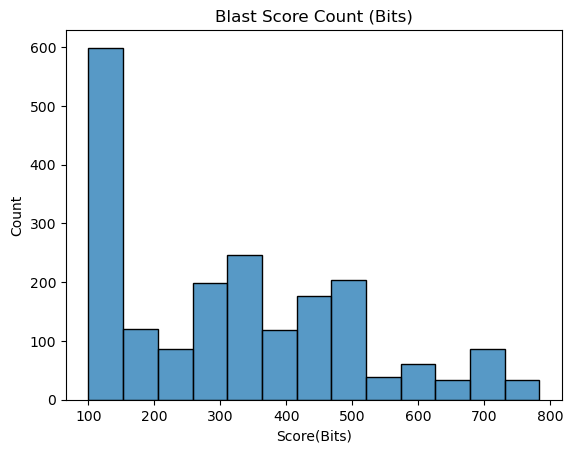

In [19]:
sns.histplot(x='Score(Bits)', data= df_concat)
plt.title ('Blast Score Count (Bits)')

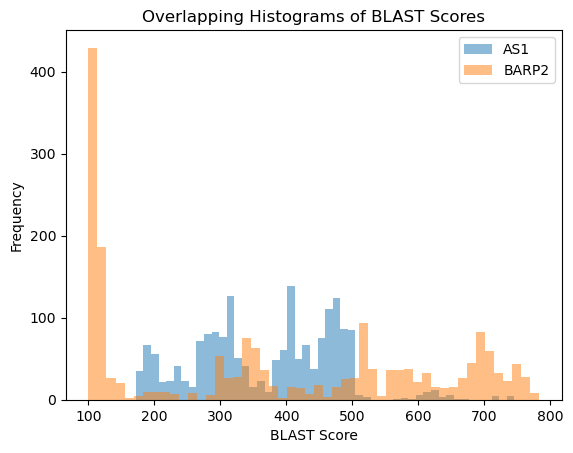

In [20]:
import matplotlib.pyplot as plt

# Example: assume both dataframes have a column "Score"
plt.hist(df_simplified['Score(Bits)_AS1'], bins=50, alpha=0.5, label='AS1')
plt.hist(df_simplified['Score(Bits)_BARP2'], bins=50, alpha=0.5, label='BARP2')

plt.xlabel('BLAST Score')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of BLAST Scores')
plt.legend()
plt.show()

<div class = "alert alert-danger">
Q6 A reasonable cut-off for 'good hits' is:

    a >250
    b >375
    c >500
    d >650
    e >700
    
Enter your answer on LEARN

In [ ]:
answer: a

#### Filtering. 

Filter the dataframe to keep only the good hits.

#### How many copies in each species?  
To find the number of copies of ARP genes in each species we need to group the dataframe by species and count the records.  

    use .groupby() and .count()

In [21]:
df3=df_concat.groupby('Organism')['Length'].count()
df3

Organism
Abies firma                      2
Abrus precatorius                6
Acacia hindsii                   1
Acacia pycnantha                 2
Acanthisitta chloris             1
                                ..
Zingiber officinale             16
Zizania palustris                4
Ziziphus jujuba                  1
Ziziphus jujuba var. spinosa     2
Zostera marina                   3
Name: Length, Length: 808, dtype: int64

In [23]:
df3.columns=['Organism','Copy_number']
df3

Organism
Abies firma                      2
Abrus precatorius                6
Acacia hindsii                   1
Acacia pycnantha                 2
Acanthisitta chloris             1
                                ..
Zingiber officinale             16
Zizania palustris                4
Ziziphus jujuba                  1
Ziziphus jujuba var. spinosa     2
Zostera marina                   3
Name: Length, Length: 808, dtype: int64

In [29]:
print(df3.shape)          # shows (rows, columns)


(808,)


In [31]:
df3 = df_concat.groupby('Organism')['Length'].count().reset_index(name='Copy_number')
df3

,Organism,Copy_number
0,Abies firma,2
1,Abrus precatorius,6
2,Acacia hindsii,1
3,Acacia pycnantha,2
4,Acanthisitta chloris,1
...,...,...
803,Zingiber officinale,16
804,Zizania palustris,4
805,Ziziphus jujuba,1
806,Ziziphus jujuba var. spinosa,2


Tidy this dataframe so you have only two columns - 'Organism' and a single column of counts which is the copy number.  Rename this column 'Copy_number'.  Reset the index.

<div class = "alert alert-danger">
Q7 Make a histogram to show the count of copies per species. 
    Label the y-axis "Copy number of ARP per species", give an appropriate title.   
    
Upload the plot to LEARN (2 marks)

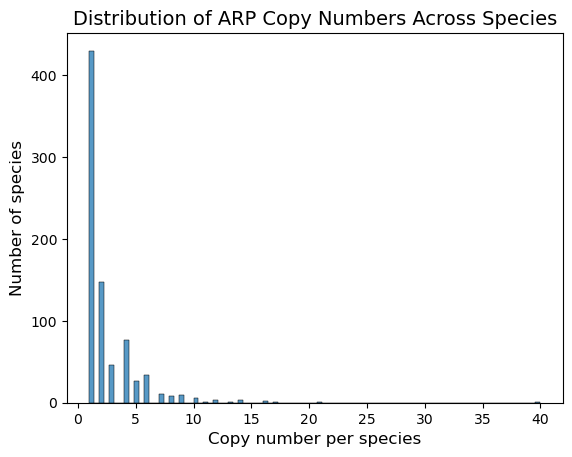

In [43]:
sns.histplot(x='Copy_number', data=df3)
plt.xlabel('Copy number per species', fontsize=12)
plt.ylabel('Number of species', fontsize=12)
plt.title('Distribution of ARP Copy Numbers Across Species', fontsize=14)

plt.show()

Subset the dataframe to find the species with a copy number of over 4.

In [48]:
over_4=df3[df3['Copy_number']>4]
over_4
over_4['Copy_number'].argmax()

21

In [49]:
over_4.iloc[21]

Organism       Causonis japonica
Copy_number                   40
Name: 132, dtype: object

In [54]:
reset_over_4=over_4.reset_index(drop=True)
reset_over_4

,Organism,Copy_number
0,Abrus precatorius,6
1,Amphiprion ocellaris,5
2,Amphiprion percula,5
3,Arachis hypogaea,6
4,Artemisia annua,6
...,...,...
102,Vigna radiata var. radiata,6
103,Vigna unguiculata,5
104,Vitis vinifera,9
105,Vulpes vulpes,6


In [55]:
reset_over_4['Copy_number'].argmax()

21

In [56]:
reset_over_4.iloc[21]

Organism       Causonis japonica
Copy_number                   40
Name: 21, dtype: object

<div class = "alert alert-danger">
Q8 Of the following options, which species has the most copies of the ARP gene?

    a Ananas comosus
    b Vigna angularis var. angularis
    c Zingiber officinale
    d Ziziphus jujuba
    e Tripterygium wilfordii
    
Enter your answer on LEARN

In [ ]:
d

In [58]:
species_list = [
    'Ananas comosus',
    'Vigna angularis var. angularis',
    'Zingiber officinale',
    'Ziziphus jujuba',
    'Tripterygium wilfordii'
]

df_selected = df3[df3['Organism'].isin(species_list)]
print(df_selected)


                           Organism  Copy_number
30                   Ananas comosus            3
768          Tripterygium wilfordii            4
787  Vigna angularis var. angularis            3
803             Zingiber officinale           16
805                 Ziziphus jujuba            1


In [57]:
df3_sorted = df3.sort_values('Copy_number', ascending=False)
print(df3_sorted.head(1))  # top species


              Organism  Copy_number
132  Causonis japonica           40


#### What happens to duplicated ARP proteins?
Is there more sequence variation where there are multiple copies of ARP?

Join the copy number dataframe to the hit-score (good hits) filtered dataframe:  

Columns should now be:

        Accession	Organism	Length	Score(Bits)	Identities(%)	E()	Copy_number
        
With one row for each Accession.

In [59]:
good_hits=df_concat[df_concat['Score(Bits)']>250]
good_hits.head()

,Description,Organism,Common Name,Score(Bits),Query Cover,E(),Identities(%),Length,Accession,Hit,DB,Positives(%)
0,myb-like HTH transcriptional regulator family ...,Arabidopsis thaliana,thale cress,746,100%,0.0,100.00,367,NP_181299.1,NaN,NaN,NaN
1,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,736,100%,0.0,98.64,368,XP_002881522.1,NaN,NaN,NaN
2,transcription factor AS1 [Arabidopsis lyrata s...,Arabidopsis lyrata subsp. lyrata,NaN,735,100%,0.0,98.64,368,XP_002881519.1,NaN,NaN,NaN
3,transcription factor AS1 [Capsella rubella],Capsella rubella,NaN,721,100%,0.0,96.47,368,XP_006294459.1,NaN,NaN,NaN
4,PREDICTED: transcription factor AS1 [Camelina ...,Camelina sativa,false flax,717,100%,0.0,95.66,369,XP_010505355.1,NaN,NaN,NaN


In [69]:
good_hits_merged=good_hits.merge(df3, how='inner', on='Organism')
good_hits_merged

,Organism,Score(Bits),E(),Identities(%),Length,Accession,Copy_number
0,Arabidopsis thaliana,746,0.000000e+00,100.00,367,NP_181299.1,2
1,Arabidopsis lyrata subsp. lyrata,736,0.000000e+00,98.64,368,XP_002881522.1,4
2,Arabidopsis lyrata subsp. lyrata,735,0.000000e+00,98.64,368,XP_002881519.1,4
3,Capsella rubella,721,0.000000e+00,96.47,368,XP_006294459.1,2
4,Camelina sativa,717,0.000000e+00,95.66,369,XP_010505355.1,4
...,...,...,...,...,...,...,...
1203,Capsicum chinense,284,5.000000e-27,45.00,318,A0A2G3D7M1,5
1204,Populus alba,285,7.400000e-27,41.40,361,A0A4U5QAW1,5
1205,Cuscuta campestris,263,4.700000e-24,45.10,308,A0A484K6A6,7
1206,Cuscuta australis,260,1.300000e-23,44.30,307,A0A328DTZ9,4


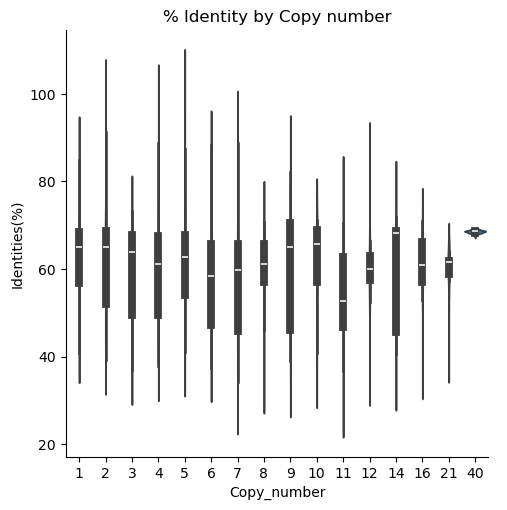

In [73]:
sns.catplot(x='Copy_number',y='Identities(%)', data=good_hits_merged, kind='violin')
plt.title('% Identity by Copy number');

<div class = "alert alert-danger">
Q9 Make a violin plot to show the % Identity by Copy number. Label the X and Y axes and give an appropriate title.
    
    
   Upload the plot to LEARN (2 marks)

#### Is there a pattern to the length of ARP proteins?

Sometimes BLAST hits detect a full-length protein and sometimes a truncated protein. It's important to distinguish these, and truncated proteins may have a different function or have lost function. Usually, full-length proteins will have similar lengths to one another, and truncated proteins will be clearly shorter.

Using the filtered data frame of good hits, next investigate the length of ARP proteins.  

<div class = "alert alert-danger">
Q10 Plot a histogram of the length of ARP proteins in amino acids.  Bin the data into 50 bins.   Label the X and Y axes and give an appropriate title.
    
    
   Upload the plot to LEARN (2 marks)

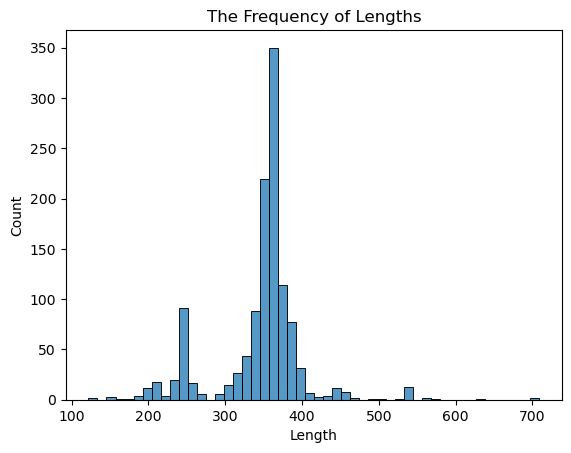

In [76]:
sns.histplot(x='Length', data=good_hits_merged,bins=50)
plt.title('The Frequency of Lengths');

<div class = "alert alert-danger">
Q11 What is a good dividing line between truncated and full length ARP proteins?

    a 200 amino acids long
    b 300 amino acids long
    c 350 amino acids long
    d 450 amino acids long
    e 500 amino acids long
    
Enter your answer on LEARN (1 mark)

In [ ]:
answer= b

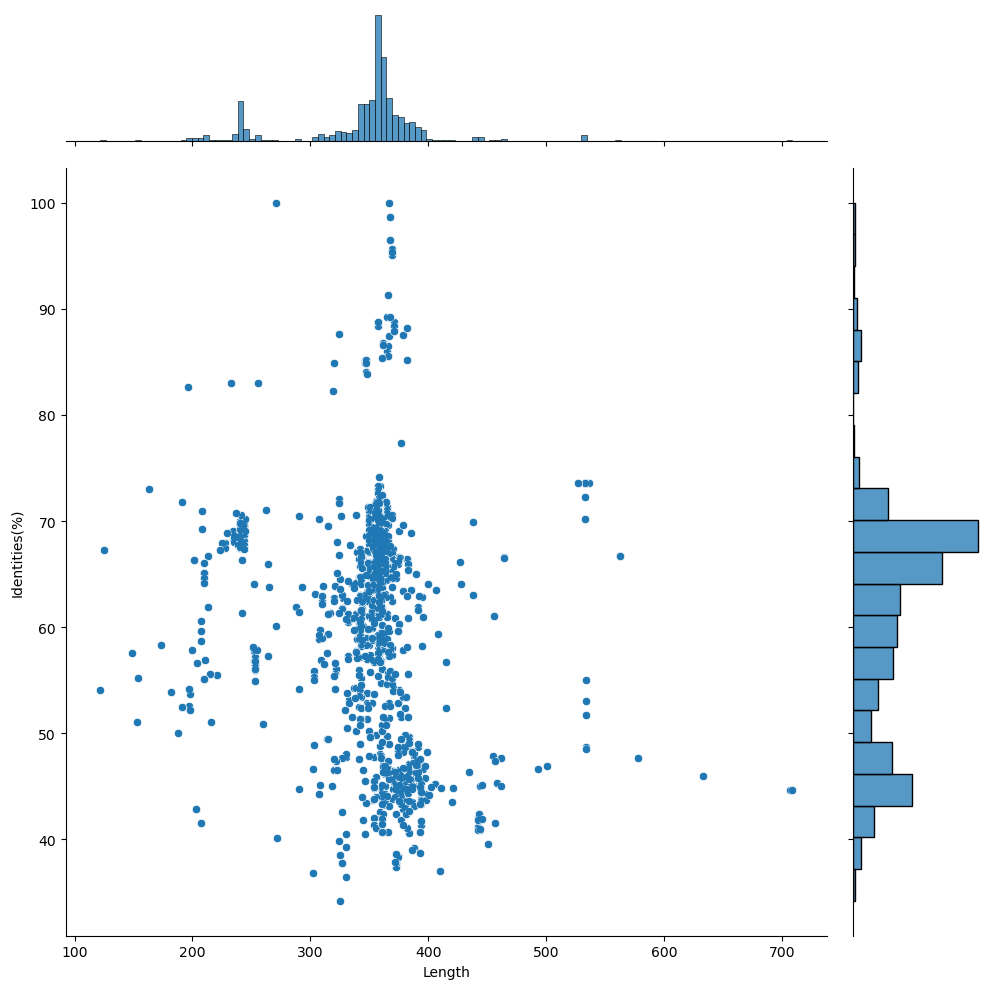

In [92]:
g = sns.jointplot(x='Length', y='Identities(%)', data=good_hits_merged, kind='scatter', height=10)

# replot the scatter points with small size
g.plot_joint(plt.scatter, s=5)


Is there any evidence that the short proteins are not real ARP proteins?  Plot identity by length in a scatter plot.

<div class = "alert alert-danger">
Q12 Plot identity by length in a scatter plot.  Use jointplot to show historgrams as well, and make the points small enough to distinguish (for example s=5).  Label the X and Y axes and give an appropriate title.
    
As this is a jointplot you have to set the title and labels with:
    `ax.fig.suptitle('Title here')`
    `ax.set_axis_labels('X label', 'Y label')`
    
    
   Upload the plot to LEARN (2 marks)

Categorise each protein as full length or truncated in a new column called 'Size'.  

Assign values based on a conditional length range of your choice, for example using DataFrame.loc[]. 

<div class = "alert alert-danger">
Q13 Which of these species has only truncated ARP genes?  Look up the matching dataframe rows to check.
    
    a Sesamum indicum
    b Solanum lycopersicum
    c Momordica charantia
    d Phtheirospermum japonicum
    e Daucus carota subsp. sativus
    
Enter your answer on LEARN (2 marks)

In [ ]:
answer=c

In [96]:
good_hits

,Organism,Score(Bits),E(),Identities(%),Length,Accession
0,Arabidopsis thaliana,746,0.000000e+00,100.00,367,NP_181299.1
1,Arabidopsis lyrata subsp. lyrata,736,0.000000e+00,98.64,368,XP_002881522.1
2,Arabidopsis lyrata subsp. lyrata,735,0.000000e+00,98.64,368,XP_002881519.1
3,Capsella rubella,721,0.000000e+00,96.47,368,XP_006294459.1
4,Camelina sativa,717,0.000000e+00,95.66,369,XP_010505355.1
...,...,...,...,...,...,...
371,Capsicum chinense,284,5.000000e-27,45.00,318,A0A2G3D7M1
372,Populus alba,285,7.400000e-27,41.40,361,A0A4U5QAW1
373,Cuscuta campestris,263,4.700000e-24,45.10,308,A0A484K6A6
374,Cuscuta australis,260,1.300000e-23,44.30,307,A0A328DTZ9


In [103]:
species_list2 = ['Sesamum indicum','Solanum lycopersicum','Momordica charantia','Phtheirospermum japonicum','Daucus carota subsp. sativus']
df_selected2 = good_hits[good_hits['Organism'].isin(species_list2)]
print(df_selected2[['Organism','Length']])
print()
print(df_selected2[df_selected2['Length']<250])
print()
df_selected2[df_selected2['Length']>250]

                         Organism  Length
36           Solanum lycopersicum     271
154          Solanum lycopersicum     360
170               Sesamum indicum     361
186          Solanum lycopersicum     360
196  Daucus carota subsp. sativus     352
249  Daucus carota subsp. sativus     360
312     Phtheirospermum japonicum     321
616               Sesamum indicum     384
735     Phtheirospermum japonicum     374
36            Momordica charantia     210
94           Solanum lycopersicum     360
134               Sesamum indicum     361
136  Daucus carota subsp. sativus     352
146  Daucus carota subsp. sativus     360
162          Solanum lycopersicum     264
163               Sesamum indicum     200
174  Daucus carota subsp. sativus     204
196     Phtheirospermum japonicum     321
197     Phtheirospermum japonicum     197
349               Sesamum indicum     384
357     Phtheirospermum japonicum     374

                         Organism  Score(Bits)           E()  Identities(%)

,Organism,Score(Bits),E(),Identities(%),Length,Accession
36,Solanum lycopersicum,525,0.000000e+00,100.00,271,XP_010314931.1
154,Solanum lycopersicum,477,2.000000e-165,67.57,360,NP_001234276.2
170,Sesamum indicum,475,8.000000e-165,66.67,361,XP_011077649.1
186,Solanum lycopersicum,473,9.000000e-164,67.30,360,AAD40953.1
196,Daucus carota subsp. sativus,471,3.000000e-163,67.66,352,XP_017237506.1
249,Daucus carota subsp. sativus,459,1.000000e-158,65.47,360,XP_017249788.1
312,Phtheirospermum japonicum,442,4.000000e-152,63.91,321,GFP90141.1
616,Sesamum indicum,312,3.000000e-100,47.13,384,XP_011097206.1
735,Phtheirospermum japonicum,284,3.000000e-89,48.73,374,GFP85299.1
94,Solanum lycopersicum,695,4.900000e-88,62.70,360,A0A3Q7HZZ1


#### Do the truncated proteins show more variation than full length proteins?

Compare the average identity for short and long proteins.

<div class = "alert alert-danger">
Q14 Use a t-test to see if truncated proteins are less similar to ARP than full length proteins (by %_Identity)

    a Yes, pvalue = 0.01
    b No, pvalue > 0.05
    c Yes, pvalue = 0.05
    d No, pvalue > 0.001
    e Yes, pvalue = 5%
    
Enter your answer on LEARN (2 marks)

<div class = "alert alert-danger">
Upload your notebook to LEARN